In [82]:
!pip install -q kaggle

In [83]:
import kagglehub

# Скачать датасет
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/creditcardfraud


##  Этап 1: Разведка Данных

In [84]:
import pandas as pd
df = pd.read_csv((f"{path}/creditcard.csv"))

df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# 1. Информация о датасете
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [87]:
# 2. Проверка пропусков
print('Пропуски в данных:\n', df.isnull().sum().sum())

Пропуски в данных:
 0


In [88]:
# 3. Баланс классов
class_counts = df['Class'].value_counts()
print("\nБаланс классов:\n", class_counts)


Баланс классов:
 Class
0    284315
1       492
Name: count, dtype: int64


In [89]:
print(df['Amount'].describe())

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


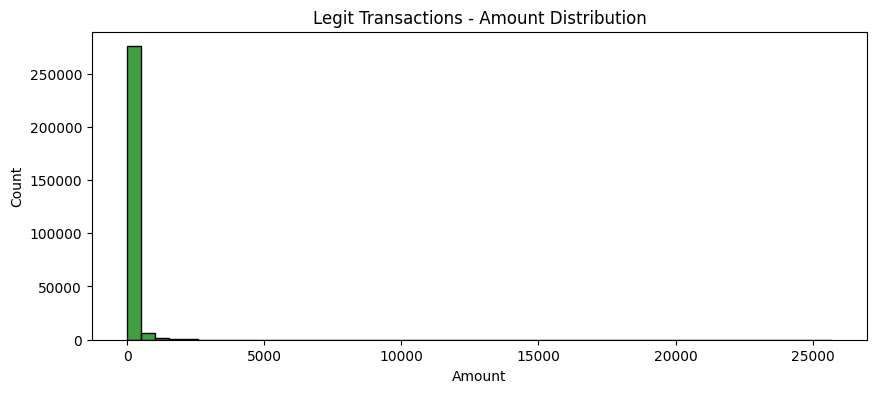

In [90]:
plt.figure(figsize=(10,4))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, color='green')
plt.title('Legit Transactions - Amount Distribution')
plt.show()

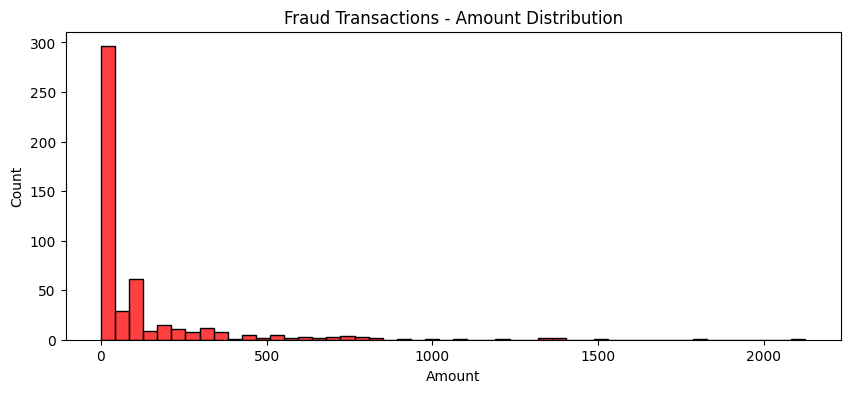

In [91]:
plt.figure(figsize=(10,4))
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color='red')
plt.title('Fraud Transactions - Amount Distribution')
plt.show()

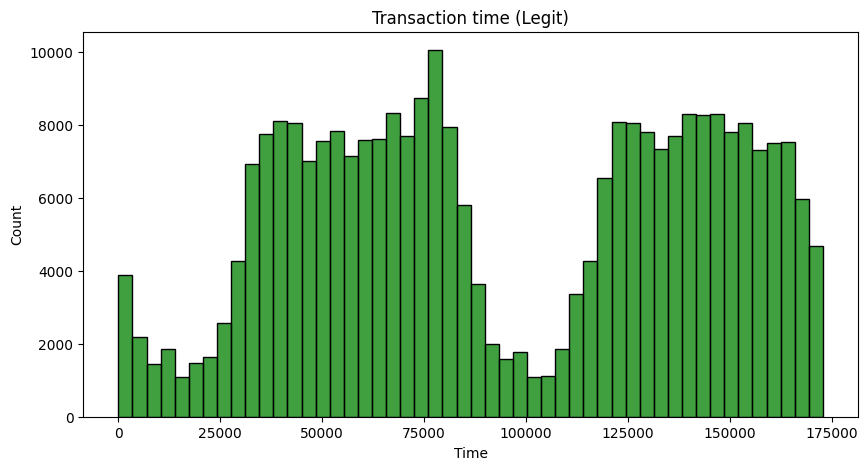

In [92]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Class'] == 0]['Time'], bins=50, color='green', label='Legit')
plt.title('Transaction time (Legit)')
plt.show()

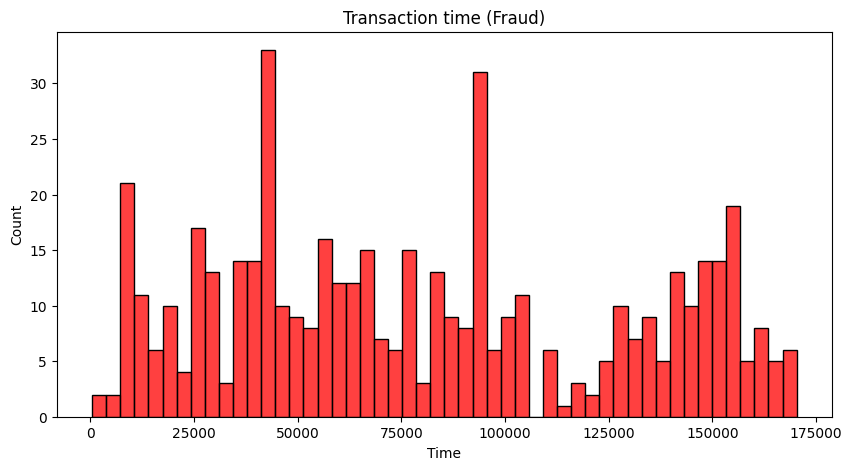

In [93]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Class'] == 1]['Time'], bins=50, color='red', label='Legit')
plt.title('Transaction time (Fraud)')
plt.show()

## Этап 2: Предобработка Данных

In [94]:
X = df.drop('Class', axis=1) # все признаки
y = df['Class']              # целевая переменная

In [95]:
# V1-V28 уже прошли через PCA(метод снижения размерности)
# Поэтому масштабируем признаки Amount и Time
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

In [96]:
# Так как Фрауд транзакций меньще - мы их синтезируем
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [97]:
# Проверим новый баланс
import numpy as np
unique, counts = np.unique(y_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(284315), np.int64(1): np.int64(284315)}


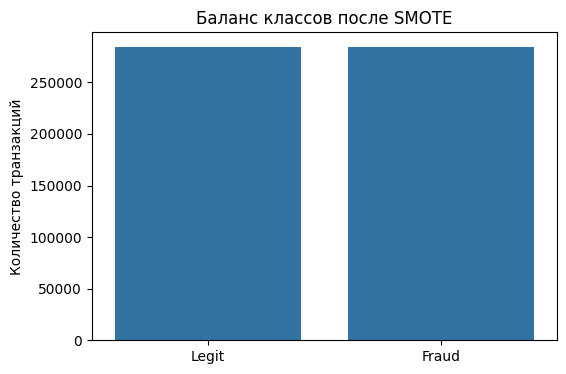

In [98]:
plt.figure(figsize=(6,4))
sns.barplot(x=np.unique(y_resampled), y=np.bincount(y_resampled))
plt.xticks([0, 1], ['Legit', 'Fraud'])
plt.title('Баланс классов после SMOTE')
plt.ylabel('Количество транзакций')
plt.show()

## Этап 3: Обучение Модели (Логистическая Регрессия)

In [99]:
# Сначала разделим данные на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,        # 20% пойдёт на тест
    random_state=42,
    stratify=y_resampled
)

In [100]:
# Сделаем логистическую регрессию
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Создаём и обучаем модель
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Прогнозы
y_pred_log = lr.predict(X_test)
y_proba_log = lr.predict_proba(X_test)[:, 1]  # вероятность для fraud transactions

# Метрики
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_log))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56863
           1       0.97      0.92      0.95     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

ROC-AUC: 0.9895045503405085


## Этап 4:  Обучение Модели (Random Forest)


In [101]:
from sklearn.ensemble import RandomForestClassifier

# Создаем модель
rf_model = RandomForestClassifier(
    n_estimators=25,       # количество деревьев
    random_state=42,        # для повторяемости
    n_jobs=-1               # использовать все ядра процессора
)

# Обучаем
rf_model.fit(X_train, y_train)

# Предсказания
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Метрики
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

ROC-AUC: 0.999981880068638


## Этап 5: Обучение Модели (XGBoost)

In [102]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Обучаем
xgb_model.fit(X_train, y_train)

# Предсказания
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Метрики
print("XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:53:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     56863
           1       0.99      0.99      0.99     56863

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726

ROC-AUC: 0.9995466677022986


## Этап 6: Сравнение Времени Обучения Моделей

In [103]:
import time

# Словарь с моделями
models_for_time = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=25, random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(n_estimators=50, learning_rate=0.1, max_depth=6, random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss')
}

training_times = {}

for name, model in models_for_time.items():
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    training_times[name] = round(end - start, 2)

print("\nВремя обучения моделей (в секундах):")
for name, t in training_times.items():
    print(f"{name}: {t} сек")

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:11:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Время обучения моделей (в секундах):
Logistic Regression: 3.12 сек
Random Forest: 71.22 сек
XGBoost: 3.74 сек


## Импортируем Модель XGBoost

In [104]:
import joblib

joblib.dump(xgb_model, "fraud_detection_xgb.pkl")

print("Модель сохранена в файл fraud_detection_xgb.pkl")

Модель сохранена в файл fraud_detection_xgb.pkl
